<a href="https://colab.research.google.com/github/lerdeljan17/ML-Homework-2/blob/main/Projekat2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/16iVftcIwsO-FDQ9NDaYUYhiKX0mqT0r1/view?usp=sharing

In [ ]:
!gdown --id 16iVftcIwsO-FDQ9NDaYUYhiKX0mqT0r1

Downloading...
From: https://drive.google.com/uc?id=16iVftcIwsO-FDQ9NDaYUYhiKX0mqT0r1
To: /content/^GSPC.csv
100% 103k/103k [00:00<00:00, 38.0MB/s]


# **Prvi deo**

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/50
8353/8353 [==============================] - 3s 372us/step - loss: 0.0016 - accuracy: 1.1972e-04
Epoch 2/50
8353/8353 [==============================] - 2s 260us/step - loss: 2.5769e-05 - accuracy: 1.1972e-04
Epoch 3/50
8353/8353 [==============================] - 2s 269us/step - loss: 2.5724e-05 - accuracy: 1.1972e-04
Epoch 4/50
8353/8353 [==============================] - 2s 282us/step - loss: 2.6750e-05 - accuracy: 1.1972e-04
Epoch 5/50
8353/8353 [==============================] - 2s 267us/step - loss: 2.4699e-05 - accuracy: 1.1972e-04
Epoch 6/50
8353/8353 [==============================] - 2s 264us/step - loss: 2.6433e-05 - accuracy: 1.1972e-04
Epoch 7/50
8353/8353 [==============================] - 2s 252us/step - loss: 3.1058e-05 - accuracy: 1.1972e-04
Epoch 8/50
8353/8353 [==============================] - 2s 255us/step - loss: 2.6721e-05 - accuracy: 1.1972e-04
Epoch 9/50
8353/8353 [====

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


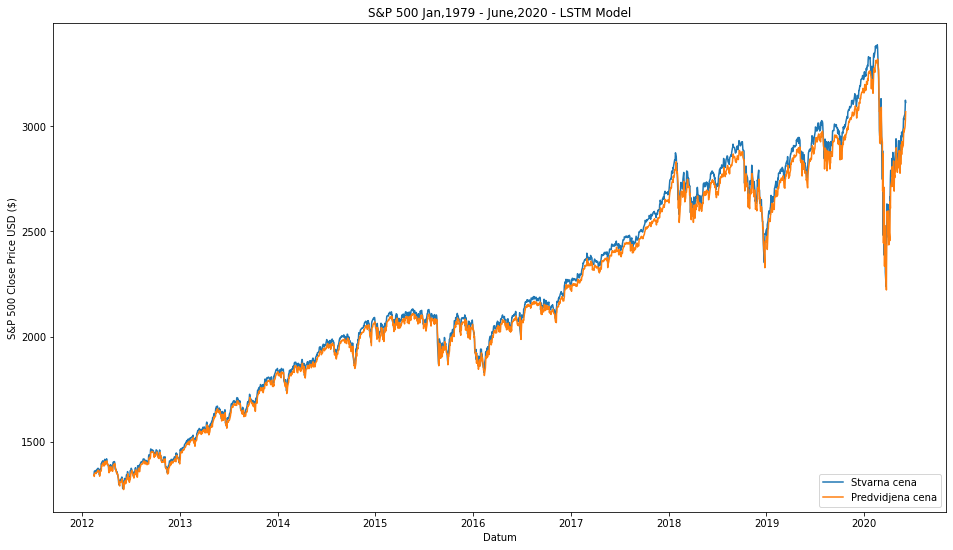

                  Close  Predictions
Date                                
2012-02-15  1343.229980  1341.725342
2012-02-16  1358.040039  1335.106079
2012-02-17  1361.229980  1349.137451
2012-02-21  1362.209961  1351.667969
2012-02-22  1357.660034  1352.818726
...                 ...          ...
2020-05-29  3044.310059  2972.293213
2020-06-01  3055.729980  2991.195557
2020-06-02  3080.820068  3001.545166
2020-06-03  3122.870117  3027.631104
2020-06-04  3112.350098  3068.102539

[2089 rows x 2 columns]


In [ ]:
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# dohvatanje podataka
all_data = web.DataReader("^GSPC", data_source="yahoo", start="1979-01-01", end=str(datetime.now()))



data = all_data.filter(['Close'])

#izvlacenje vrednosti
dataset = data.values

#broj redova za trening
training_data_len = math.ceil( len(dataset) * .8 )

#print('training_data_len',training_data_len)

#normalizacija 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#scaled_data

#kreiranje training data
train_data = scaled_data[0:training_data_len , :] # : uzimamo sve podatke od 0 do training data len

#Deljenje podataka na x train i y train
x_train = []
y_train = []

for i in range(5, len(train_data)):
  x_train.append(train_data[i-5:i, 0])
  y_train.append(train_data[i, 0])

#konverzija u numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
# print(x_train)

#Reshape jer LSTM ocekuje 3D data shape
x_train.shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

#kreiranje LSTM modela
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1))) # 50 broj neurona
model.add(LSTM(50, return_sequences= False)) 
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy']) 
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
#bolje predikcije sa mean_squared_error i batch_size 32
#sa oko 50 epoha je najbolje

model.fit(x_train, y_train, batch_size=32, epochs=50) 

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# # Trening, 15 epoha
# model.fit(X_train, Y_train,
#           batch_size=batch_size,
#           epochs=num_epochs,
#           validation_data=(X_test, Y_test))
# _, acc = model.evaluate(X_test, Y_test,
#                             batch_size=batch_size)
# print('Accuracy na test skupu:', acc)



test_data = scaled_data[training_data_len - 5: , :]


x_test = []
for i in range(5, len(test_data)):
  x_test.append(test_data[i-5:i, 0])

#konverzija u numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

#predikcija 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


#plotovanje
valid = data[training_data_len:]
valid['Predictions'] = predictions #dodavanje kolone


plt.figure(figsize=(16,9))
plt.title('S&P 500 Jan,1979 - {},{} - LSTM Model'.format(str(datetime.now().strftime('%B')),str(datetime.now().year)))
plt.xlabel('Datum')
plt.ylabel('S&P 500 Close Price USD ($)')
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Stvarna cena', 'Predvidjena cena'], loc='lower right')
plt.show()

#predikcije i prave cene
print(valid)

valid.to_csv("Predvidjena i stvarna cena S&P500 vrednosti.csv")

# **Drugi Deo**

# **Final**

In [ ]:
#plotovanje
#st bmh

def plot_graph(valid, predicted, title=None, label_x='x', label_y='y', style='fivethirtyeight', figure=(16,8)):
  plt.style.use(style)
  plt.figure(figsize=figure)
  plt.xlabel(label_x, fontsize=18)
  plt.ylabel(label_y, fontsize=18)
  plt.title(title)
  plt.plot(valid)
  plt.plot(predicted)
  plt.legend(['Stvarna cena', 'Predvidjena cena'], loc='lower right')
  plt.show()

In [ ]:
def word2Vec(symbols, embed_size):
  tf_mat = tf.random_uniform([len(symbols), embed_size], -1.0, 1.0)
  emb_matrix = sess.run(tf_mat)

  vecs = dict()
  for i, sym in enumerate(symbols):
    vecs[sym] = emb_matrix[i]
  return vecs

In [ ]:
def concat_data(dataset_list, symbol,embed_size,test_data=False):

  C_x = list()
  C_y = list()

  if not test_data:
    for ds in dataset_list:
      vec = vecs[ds]
      X = dataset_list[ds][0]
      y = dataset_list[ds][1]
      for i in range(len(X)):
        C_x.append(np.array([np.append(X[i][j], vec) for j in range(len(X[i]))]))
        C_y.append(y[i])


    C_x = np.array(C_x)
    C_x = np.reshape(C_x, (C_x.shape[0], C_x.shape[1], 1 + embed_size))
    C_y = np.array(C_y)
    C_y = np.reshape(C_y, (C_y.shape[0]))
  else:
    vec = vecs[symbol]
    X = dataset_list[symbol][2]
    y = dataset_list[symbol][3]
    for i in range(len(X)):
      C_x.append(np.array([np.append(X[i][j], vec) for j in range(len(X[i]))]))
      C_y.append(y[i])

    C_x = np.array(C_x)
    C_x = np.reshape(C_x, (C_x.shape[0], C_x.shape[1], 1 + embed_size))
    C_y = np.array(C_y)
    C_y = np.reshape(C_y, (C_y.shape[0]))
  return C_x, C_y

In [ ]:
import os
import pathlib
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdweb
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU, Flatten, Dropout, InputLayer
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from sklearn.preprocessing import MinMaxScaler

win_size = 30
batch_s = 64
embed_s = 8
data_dict = dict()

data_path = '/content/drive/My Drive/ML/Projekat 2/data'
with tf.Session() as sess:

  vecs = dict()
  l=os.listdir('/content/drive/My Drive/ML/Projekat 2/data')
  symbols=[x.split('.')[0] for x in l]
  symbols= symbols[:51]
  print(symbols)
  vecs = word2Vec(symbols,embed_s)
  #print(vecs)
  for sym in symbols:
    all_data = pd.read_csv(os.path.join(data_path, "%s.csv" % sym))
    data_close_price = all_data['Close'].tolist()
    data_close_price = np.array(data_close_price)
    

    data_close_price = [np.array(data_close_price[i:i+1]) for i in range(len(data_close_price))]
      
    scaler = MinMaxScaler(feature_range=(-1,1))

    data_close_price = scaler.fit_transform(data_close_price)


    x = np.array([data_close_price[i: i + win_size] for i in range(len(data_close_price) - win_size)])
    y = np.array([data_close_price[i + win_size] for i in range(len(data_close_price) - win_size)])


    train_data_size = int(len(x) * .8)
    train_X, test_X = x[:train_data_size], x[train_data_size:]
    train_y, test_y = y[:train_data_size], y[train_data_size:]
    
    data_dict[sym] = (train_X,train_y,test_X,test_y)

  c_train_X, c_train_y = concat_data(data_dict, symbols,embed_s)
  print(c_train_X.shape, c_train_y.shape)

  #pravimo model
  model = Sequential()
  model.add(LSTM(128, return_sequences=True))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dense(32))
  model.add(Dense(1))

  model.compile(loss='mse',optimizer='adam') 
  #fitovnaje modela
  model.fit(c_train_X, c_train_y, batch_size=batch_s, epochs=50)

  #predikcija
  symbol = symbols[0]
  c_test_X, c_test_y = concat_data(data_dict,symbol,embed_s,test_data=True)
  predicted = model.predict(c_test_X)
  predicted = scaler.inverse_transform(predicted)

['GOOG', 'AMZN', 'BAC', 'CMCSA', 'C', 'AMGN', 'BA', 'ABBV', 'CELG', 'BMY', 'AVGO', 'CHTR', 'AGN', 'ABT', 'ACN', 'AXP', 'CL', 'CB', 'BLK', 'BIIB', 'AIG', 'ADBE', 'CAT', 'BK', 'AMT', 'ADP', 'AET', 'ANTM', 'CME', 'CCL', 'AMAT', 'BDX', 'CI', 'BBT', 'ATVI', 'APC', 'BSX', 'CCI', 'AEP', 'APD', 'AON', 'ALL', 'ALXN', 'AFL', 'CBS', 'BAX', 'ADI', 'CAH', 'ADM', 'BHI', 'AVB']
(142079, 30, 9) (142079,)
Epoch 1/50
142079/142079 [==============================] - 217s 2ms/step - loss: 0.0017
Epoch 2/50
142079/142079 [==============================] - 218s 2ms/step - loss: 6.7592e-04
Epoch 3/50
142079/142079 [==============================] - 221s 2ms/step - loss: 6.5266e-04
Epoch 4/50
142079/142079 [==============================] - 221s 2ms/step - loss: 6.3182e-04
Epoch 5/50
142079/142079 [==============================] - 221s 2ms/step - loss: 6.1549e-04
Epoch 6/50
142079/142079 [==============================] - 216s 2ms/step - loss: 6.0751e-04
Epoch 7/50
142079/142079 [============================

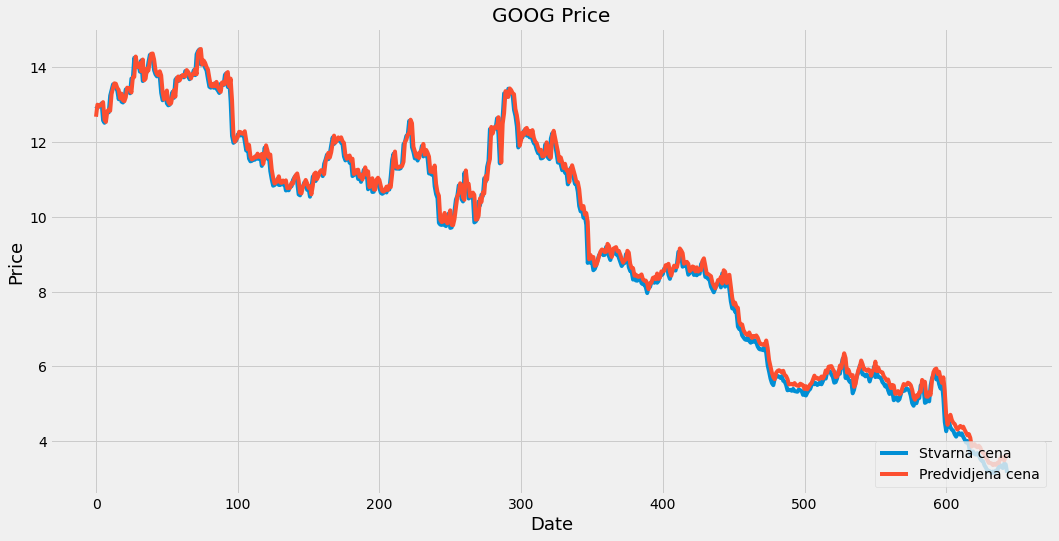

In [ ]:
# Plotovanje

test_y_scaled0 = data_dict[symbol][3]
test_y_real0 = scaler.inverse_transform(test_y_scaled0)
plot_graph(test_y_real0[:], predicted[:], '{} Price'.format(symbol), 'Date', 'Price')

In [ ]:
for d in data_dict:
  print(data_dict[d][0])

[[[ 0.94068949]
  [ 0.9217761 ]
  [ 0.91464342]
  ...
  [ 0.98477076]
  [ 1.        ]
  [ 0.98269307]]

 [[ 0.9217761 ]
  [ 0.91464342]
  [ 0.88521307]
  ...
  [ 1.        ]
  [ 0.98269307]
  [ 0.96416523]]

 [[ 0.91464342]
  [ 0.88521307]
  [ 0.88244996]
  ...
  [ 0.98269307]
  [ 0.96416523]
  [ 0.95968856]]

 ...

 [[-0.59448663]
  [-0.59217333]
  [-0.59557902]
  ...
  [-0.63057843]
  [-0.62850074]
  [-0.63533355]]

 [[-0.59217333]
  [-0.59557902]
  [-0.59607167]
  ...
  [-0.62850074]
  [-0.63533355]
  [-0.62961456]]

 [[-0.59557902]
  [-0.59607167]
  [-0.59442237]
  ...
  [-0.63533355]
  [-0.62961456]
  [-0.62766539]]]
[[[ 0.98104181]
  [ 0.97869441]
  [ 0.9903916 ]
  ...
  [ 0.98340909]
  [ 1.        ]
  [ 0.99082925]]

 [[ 0.97869441]
  [ 0.9903916 ]
  [ 0.96576385]
  ...
  [ 1.        ]
  [ 0.99082925]
  [ 0.96938441]]

 [[ 0.9903916 ]
  [ 0.96576385]
  [ 0.97041885]
  ...
  [ 0.99082925]
  [ 0.96938441]
  [ 0.96673861]]

 ...

 [[-0.93212449]
  [-0.93196535]
  [-0.93234332]
  ..